In [3]:
import os
import pymysql
import dotenv
from dotenv import load_dotenv
load_dotenv()

HOST = os.getenv('HOST')
USER = os.getenv('MYSQL_USER')
PASSWORD = os.getenv('MYSQL_ROOT_PASSWORD')
DB = os.getenv('MYSQL_DATABASE')

connection = pymysql.connect(host=HOST, 
                      user = USER,
                     password = PASSWORD,
                     db = DB)

cursor = connection.cursor()

* __Quantos usuários únicos não jogaram após o dia 03/02/2020?__
> A análise de jogos por usuário será feita a partir de updated_at (última atualização do registro), na tabela matchmaking_stats_summary

>OBS: updated_at e created_at possuem sempre a mesma data neste banco de dados
>Como o número de usuários que jogaram é diferente do número de usuários distintos, sei que um mesmo usuário jogou várias partidas.

In [2]:
#Retrieving the total user number:
total_registros = cursor.execute("SELECT player_id FROM matchmaking_stats_summary")
total = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary")
(total_registros, total)
#27 usuers has played more than one single date 

(2057, 2030)

In [3]:
#"%Y/%m/%d"
#Retrieving the number of players who played after this date 03/02/2020
strong_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at >= '2020-02-03'")
strong_players

1304

In [5]:
#Retrieving the number of player who haven't played
weak_players = total - strong_players
weak_players

726

* __Quantos usuários únicos jogaram em fevereiro após o dia 06/02/2020?__
> Usando o mesmo raciocínio do exercício anterior 

In [8]:
#Retrieving the total user number:
total = cursor.execute("SELECT distinct player_id FROM matchmaking_stats_summary")
total

2030

In [12]:
#Retrieving the number of users who played after the date 
faithful_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at > '2020-02-06 23:59:59'")
faithful_players

0

In [14]:
#or
faithful_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at >= '2020-02-07'")
faithful_players

0

* __Em qual dia mais jogadores deixaram de jogar no mês de fevereiro?__
>No caso, vou usar a mesma tabela, e fazer as operações passo a passo:

In [16]:
#Retrieving the number of active players during the month of February (players who updated their stats)
feb_players = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01 00:00:00' AND '2020-02-29 23:59:59'")
feb_players
#every player have done some update in their stats during this month

2030

* __Checking by day:__

In [19]:
day1 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-01 00:00:00' AND '2020-02-01 23:59:59'")
day1

326

In [20]:
day2 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-02 00:00:00' AND '2020-02-02 23:59:59'")
day2

408

In [21]:
day3 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-03 00:00:00' and '2020-02-03 23:59:59'")
day3

313

In [22]:
day4 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-04 00:00:00' and '2020-02-04 23:59:59'")
day4

330

In [23]:
dia5 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-05 00:00:00' and '2020-02-05 23:59:59'")
dia5

338

In [24]:
dia6 = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
dia6

330

 >## In the above case we can see that all players have played in February. We can notice that 03/02/2020 was the day where less players have played. 
>## We must be careful looking these numbers, because the variables dayN refers to the number of active single players in that day, but in this analyse we can't say who are the players. Thus, the sum of number of players of variables dayN are going to be higher than the feb_players variable (number of total single player in the February mounth). 
>## We can take a look in the intersection between these variables:

In [4]:
cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
a = cursor.fetchall()
cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary WHERE updated_at BETWEEN '2020-02-06 00:00:00' and '2020-02-06 23:59:59'")
b = cursor.fetchall()

In [6]:
intersec = set(a).intersection(set(b))
len(intersec)

330

In [12]:
#10 players ids
list(intersec)[0:10]

[(1269653,),
 (802646,),
 (576674,),
 (786888,),
 (1268835,),
 (27390,),
 (858828,),
 (1234254,),
 (471706,),
 (345015,)]

## Observations regarding the tables

* ### The number of players:
>The number of players is different between the tables. Therefore is hard to do the correlation between these tables, because not all the tables contain every player.

In [4]:
players = cursor.execute("SELECT DISTINCT player_id FROM players")
players_matchmaking = cursor.execute("SELECT DISTINCT player_id FROM matchmaking_stats_summary")
players_monthly = cursor.execute("SELECT DISTINCT player_id FROM player_monthly_stats")
players, players_matchmaking, players_monthly

(3645, 2030, 3700)

* ### created_at == updated_at:
>Every created_at date is equal updated_at date.

In [13]:
query1 = "SELECT created_at FROM matchmaking_stats_summary WHERE created_at=updated_at;"
query2 = "SELECT created_at FROM matchmaking_stats_summary WHERE created_at!=updated_at;"
cursor.execute(query1), cursor.execute(query2)

(2057, 0)

# Correlation Using Pandas

In [3]:
import pandas as pd
match = pd.read_csv('../csv/matchmaking_stats.csv')

In [4]:
#Removing the unnecessaries columns
my_df = match.drop(columns=['player_id', 'created_at', 'updated_at'])

* ## Aplying the Correlation Methods:

>__Pearson:__ Correlation between sets of data is a measure of how well they are related. The most common measure of correlation in stats is the Pearson Correlation. The full name is the Pearson Product Moment Correlation (PPMC). It shows the linear relationship between two sets of data. In simple terms, it answers the question, Can I draw a line graph to represent the data?
* __Source:__ https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

>__Spearman:__ The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

* Using __matchmaking_stats__ table

In [5]:
#Checking if is there a player with no matches played
len(my_df['matches_played']), my_df[ my_df['matches_played'] == 0]
#No, there isn't

(2057,
 Empty DataFrame
 Columns: [matches_played, total_wins, total_loss, mm_points, kills, death, assist, hs]
 Index: [])

In [22]:
#Analysing the pearson correlation
my_df.corr(method ='pearson')

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
matches_played,1.000000,0.887964,0.878356,0.689930,0.974546,0.984908,0.949598,0.914814
total_wins,0.887964,1.000000,0.560330,0.944465,0.906658,0.855386,0.884865,0.881565
total_loss,0.878356,0.560330,1.000000,0.261150,0.812837,0.885040,0.790564,0.731682
mm_points,0.689930,0.944465,0.261150,1.000000,0.740193,0.651729,0.723895,0.743512
kills,0.974546,0.906658,0.812837,0.740193,1.000000,0.973337,0.956963,0.954986
death,0.984908,0.855386,0.885040,0.651729,0.973337,1.000000,0.953071,0.910926
assist,0.949598,0.884865,0.790564,0.723895,0.956963,0.953071,1.000000,0.901647
hs,0.914814,0.881565,0.731682,0.743512,0.954986,0.910926,0.901647,1.000000


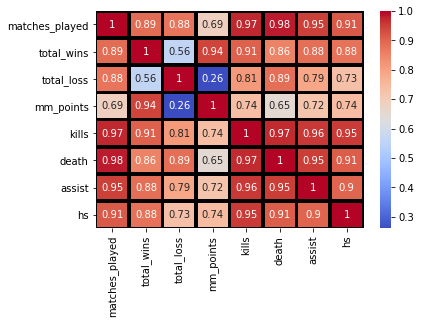

In [15]:
#Showing in a Heatmap:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
heatmap_chart = sns.heatmap(my_df.corr(method ='pearson'), annot = True, fmt='.2g', 
            cmap= 'coolwarm', linewidths=2.5, linecolor='black')
heatmap_chart

__Table Caption:__

__Evans (1996)__ suggests for the absolute value of r:
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

In [35]:
#exporting this image to images/
figure = heatmap_chart.get_figure()    
figure.savefig('../images/correlations/heatmap_pearson_matchmakingsummary.png', dpi=400)

In [17]:
#Analysing the spearman correlation
my_df.corr(method ='spearman')

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs
matches_played,1.000000,0.696985,0.646230,0.425585,0.866243,0.877945,0.814957,0.809291
total_wins,0.696985,1.000000,0.007776,0.922539,0.709262,0.567913,0.668185,0.679919
total_loss,0.646230,0.007776,1.000000,-0.270040,0.464661,0.625495,0.452129,0.428923
mm_points,0.425585,0.922539,-0.270040,1.000000,0.495879,0.324285,0.469164,0.488657
kills,0.866243,0.709262,0.464661,0.495879,1.000000,0.893996,0.832287,0.916895
death,0.877945,0.567913,0.625495,0.324285,0.893996,1.000000,0.844304,0.821778
assist,0.814957,0.668185,0.452129,0.469164,0.832287,0.844304,1.000000,0.774843
hs,0.809291,0.679919,0.428923,0.488657,0.916895,0.821778,0.774843,1.000000


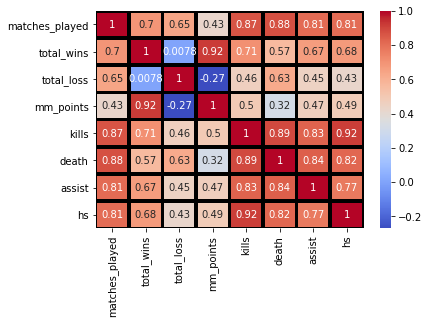

In [18]:
#Showing in a Heatmap:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
heatmap_chart = sns.heatmap(my_df.corr(method ='spearman'), annot = True, fmt='.2g', 
            cmap= 'coolwarm', linewidths=2.5, linecolor='black')
heatmap_chart

__Table Caption:__

__Evans (1996)__ suggests for the absolute value of r:
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

In [26]:
#exporting this image to images/
figure = heatmap_chart.get_figure()    
figure.savefig('../images/correlations/heatmap_spearman_matchmakingsummary.png', dpi=400)

* Using __monthly_stats__ table:

In [11]:
monthly = pd.read_csv('../csv/monthly_stats.csv')

In [24]:
#Checking if is there a player with total_played = 0
len(monthly['total_played']), monthly[ monthly['total_played'] == 0]
#No, there isn't

(3700,
 Empty DataFrame
 Columns: [player_id, game_mode, ref_date, total_played, kills, deaths, assists, wins, loss, headshots]
 Index: [])

In [33]:
#Analysing the pearson correlation
my_df2 = monthly.drop(columns=['player_id', 'game_mode', 'ref_date'])
my_df2.corr(method ='pearson')

,total_played,kills,deaths,assists,wins,loss,headshots
total_played,1.000000,0.980313,0.991676,0.977086,0.962017,0.956470,0.943267
kills,0.980313,1.000000,0.981154,0.973452,0.965331,0.931750,0.973025
deaths,0.991676,0.981154,1.000000,0.981392,0.957663,0.967152,0.945501
assists,0.977086,0.973452,0.981392,1.000000,0.957183,0.933927,0.939418
wins,0.962017,0.965331,0.957663,0.957183,1.000000,0.876682,0.936704
loss,0.956470,0.931750,0.967152,0.933927,0.876682,1.000000,0.886583
headshots,0.943267,0.973025,0.945501,0.939418,0.936704,0.886583,1.000000


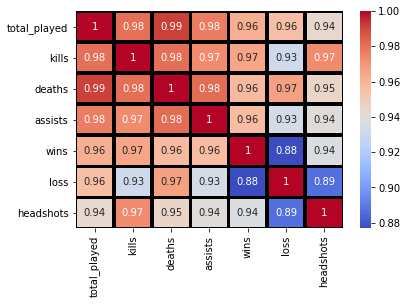

In [32]:
heatmap_chart_monthly = sns.heatmap(my_df2.corr(method ='pearson'), annot = True, fmt='.2g', 
            cmap= 'coolwarm', linewidths=2.5, linecolor='black')
heatmap_chart_monthly

__Table Caption:__

__Evans (1996)__ suggests for the absolute value of r:
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

In [34]:
#exporting this image to images/
figure2 = heatmap_chart_monthly.get_figure()    
figure2.savefig('../images/correlations/heatmap_pearson_monthly.png', dpi=400)

In [36]:
#Analysing the spearman correlation
my_df2.corr(method ='spearman')

,total_played,kills,deaths,assists,wins,loss,headshots
total_played,1.000000,0.982518,0.989723,0.979093,0.954233,0.943255,0.966492
kills,0.982518,1.000000,0.984027,0.980814,0.962614,0.925586,0.986897
deaths,0.989723,0.984027,1.000000,0.983786,0.949653,0.960312,0.967235
assists,0.979093,0.980814,0.983786,1.000000,0.956133,0.928219,0.964110
wins,0.954233,0.962614,0.949653,0.956133,1.000000,0.850956,0.947928
loss,0.943255,0.925586,0.960312,0.928219,0.850956,1.000000,0.903253
headshots,0.966492,0.986897,0.967235,0.964110,0.947928,0.903253,1.000000


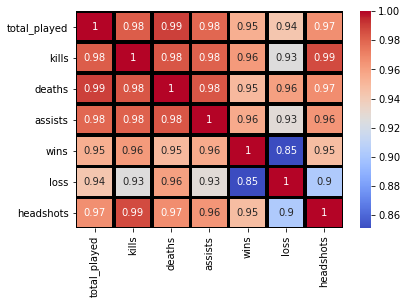

In [37]:
heatmap_chart_monthly = sns.heatmap(my_df2.corr(method ='spearman'), annot = True, fmt='.2g', 
            cmap= 'coolwarm', linewidths=2.5, linecolor='black')
heatmap_chart_monthly

In [38]:
figure2 = heatmap_chart_monthly.get_figure()    
figure2.savefig('../images/correlations/heatmap_spearman_monthly.png', dpi=400)

>In the tables above we can see a, at least strong, correlation between matches_played or total_played and every other rows. As expected.

>Looking for these images above we can notice the spearman correlation method was more trustworthy than the pearson one, for the mm_points, total_loss and total_wins. Using this correlation method we can notice the mm_points and total_loss are inversely related (even that we can not to say if it is linear or not), while using the Pearson one we can't notice that it be inversely related. But in fact, it is. How in the case of mm_points, the variables tend to move in the same relative direction but not in the same rate, so it isn't a linear relationship. Therefore the choice of the Spearman correlation for the matchmaking_stats table is better than the Pearson one.

>Every other relation with total_played or matches_played is going to be a linear relationship, in this case the choice of Pearson is more recommended. But in the related above case, the results are so near.

Sources:https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/linear-nonlinear-and-monotonic-relationships/, 
https://www.ucl.ac.uk/child-health/short-courses-events/about-statistical-courses/research-methods-and-statistics/chapter-8-content-5, 
http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1442
